In [1]:
%matplotlib inline


Customizing Matplotlib with style sheets and rcParams
=====================================================

Tips for customizing the properties and default styles of Matplotlib.

Using style sheets
------------------

The ``style`` package adds support for easy-to-switch plotting "styles" with
the same parameters as a
`matplotlib rc <customizing-with-matplotlibrc-files>` file (which is read
at startup to configure matplotlib).

There are a number of pre-defined styles `provided by Matplotlib`_. For
example, there's a pre-defined style called "ggplot", which emulates the
aesthetics of ggplot_ (a popular plotting package for R_). To use this style,
just add:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
data = np.random.randn(50)

To list all available styles, use:



In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Defining your own style
-----------------------

You can create custom styles and use them by calling ``style.use`` with the
path or URL to the style sheet. Additionally, if you add your
``<style-name>.mplstyle`` file to ``mpl_configdir/stylelib``, you can reuse
your custom style sheet with a call to ``style.use(<style-name>)``. By default
``mpl_configdir`` should be ``~/.config/matplotlib``, but you can check where
yours is with ``matplotlib.get_configdir()``; you may need to create this
directory. You also can change the directory where matplotlib looks for
the stylelib/ folder by setting the MPLCONFIGDIR environment variable,
see `locating-matplotlib-config-dir`.

Note that a custom style sheet in ``mpl_configdir/stylelib`` will
override a style sheet defined by matplotlib if the styles have the same name.

For example, you might want to create
``mpl_configdir/stylelib/presentation.mplstyle`` with the following::

   axes.titlesize : 24
   axes.labelsize : 20
   lines.linewidth : 3
   lines.markersize : 10
   xtick.labelsize : 16
   ytick.labelsize : 16

Then, when you want to adapt a plot designed for a paper to one that looks
good in a presentation, you can just add::

   >>> import matplotlib.pyplot as plt
   >>> plt.style.use('presentation')


Composing styles
----------------

Style sheets are designed to be composed together. So you can have a style
sheet that customizes colors and a separate style sheet that alters element
sizes for presentations. These styles can easily be combined by passing
a list of styles::

   >>> import matplotlib.pyplot as plt
   >>> plt.style.use(['dark_background', 'presentation'])

Note that styles further to the right will overwrite values that are already
defined by styles on the left.


Temporary styling
-----------------

If you only want to use a style for a specific block of code but don't want
to change the global styling, the style package provides a context manager
for limiting your changes to a specific scope. To isolate your styling
changes, you can write something like the following:



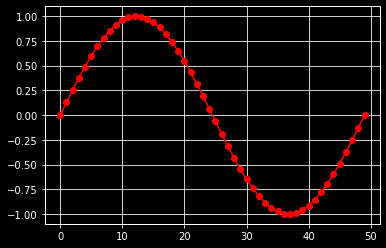

In [4]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()


matplotlib rcParams
===================


Dynamic rc settings
-------------------

You can also dynamically change the default rc settings in a python script or
interactively from the python shell. All of the rc settings are stored in a
dictionary-like variable called :data:`matplotlib.rcParams`, which is global to
the matplotlib package. rcParams can be modified directly, for example:



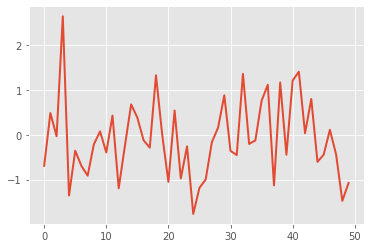

In [5]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(data)

Matplotlib also provides a couple of convenience functions for modifying rc
settings. The :func:`matplotlib.rc` command can be used to modify multiple
settings in a single group at once, using keyword arguments:



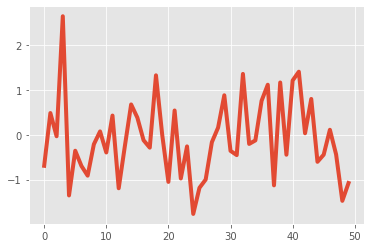

In [6]:
mpl.rc('lines', linewidth=4, color='g')
plt.plot(data)

The :func:`matplotlib.rcdefaults` command will restore the standard matplotlib
default settings.

There is some degree of validation when setting the values of rcParams, see
:mod:`matplotlib.rcsetup` for details.


The :file:`matplotlibrc` file
-----------------------------

matplotlib uses :file:`matplotlibrc` configuration files to customize all kinds
of properties, which we call `rc settings` or `rc parameters`. You can control
the defaults of almost every property in matplotlib: figure size and dpi, line
width, color and style, axes, axis and grid properties, text and font
properties and so on. matplotlib looks for :file:`matplotlibrc` in four
locations, in the following order:

1. :file:`matplotlibrc` in the current working directory, usually used for
   specific customizations that you do not want to apply elsewhere.

2. :file:`$MATPLOTLIBRC` if it is a file, else :file:`$MATPLOTLIBRC/matplotlibrc`.

3. It next looks in a user-specific place, depending on your platform:

   - On Linux and FreeBSD, it looks in :file:`.config/matplotlib/matplotlibrc`
     (or `$XDG_CONFIG_HOME/matplotlib/matplotlibrc`) if you've customized
     your environment.

   - On other platforms, it looks in :file:`.matplotlib/matplotlibrc`.

   See `locating-matplotlib-config-dir`.

4. :file:`{INSTALL}/matplotlib/mpl-data/matplotlibrc`, where
   :file:`{INSTALL}` is something like
   :file:`/usr/lib/python3.7/site-packages` on Linux, and maybe
   :file:`C:\\Python37\\Lib\\site-packages` on Windows. Every time you
   install matplotlib, this file will be overwritten, so if you want
   your customizations to be saved, please move this file to your
   user-specific matplotlib directory.

Once a :file:`matplotlibrc` file has been found, it will *not* search any of
the other paths.

To display where the currently active :file:`matplotlibrc` file was
loaded from, one can do the following::

  >>> import matplotlib
  >>> matplotlib.matplotlib_fname()
  '/home/foo/.config/matplotlib/matplotlibrc'

See below for a sample `matplotlibrc file<matplotlibrc-sample>`.


A sample matplotlibrc file
~~~~~~~~~~~~~~~~~~~~~~~~~~

.. literalinclude:: ../../../matplotlibrc.template



